In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
config_file = "C:/Users/hp/Downloads/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "C:/Users/hp/Downloads/frozen_inference_graph.pb"

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [6]:
with open("C:/Users/hp/Downloads/coco.names", 'r') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


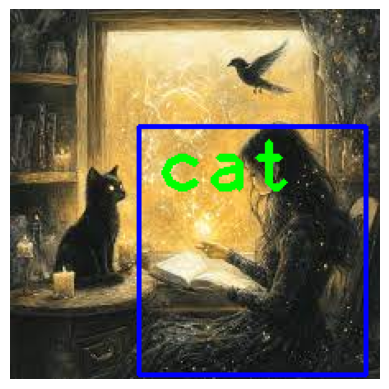

In [7]:
# Read image
img = cv2.imread("C:/Users/hp/Pictures/test.jfif")

# Set model input params
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

# Detect objects
classIndex, confidence, bbox = model.detect(img, confThreshold=0.55)

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

# Draw detections
for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40),
                font, font_scale, (0, 255, 0), 3)

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [8]:
cap = cv2.VideoCapture(0)  # Use 1 if 0 doesn't work

if not cap.isOpened():
    raise IOError("Cannot open webcam")

font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if classIndex is not None:
        for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
            if 0 < ClassInd <= len(classLabels):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40),
                        font, font_scale, (0, 255, 0), 2)
            else:
                print(f"Warning: ClassInd {ClassInd} is out of range")


    cv2.imshow('Object Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('a'):
        break

cap.release()
cv2.destroyAllWindows()


AttributeError: 'tuple' object has no attribute 'flatten'